# Exercise 8

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Die Likelihood-Funktion L und die negative log-likelihood-Funktion lauten:

$L(\lambda) = \Pi_i \frac{\lambda^{x_i}}{x_i!}e^{-\lambda}$

$l(\lambda) = -\text{ln}(L) = -\Sigma_i (x_i \text{ln}(\lambda) - \text{ln}(x_i!) + \lambda)$

$\Rightarrow l(\lambda) = 3\lambda - (13+8+9) \text{ln}(\lambda) + \text{ln}(13! \cdot 8! \cdot 9!)$

In [24]:
#def poisson(x, y): # Poisson-Verteilung (y := lambda)
#   return y**x/np.math.factorial(x)*np.exp(-y)

def l(y):  # negative log-likelihood function (y := lambda)
    return 3*y -(13+8+9)*np.log(y) + np.log(np.math.factorial(13)) + np.log(np.math.factorial(8)) + np.log(np.math.factorial(9))
    #np.log(np.math.factorial(13)*np.math.factorial(8)*np.math.factorial(9))

Minimum: ( [10.00018002] , [6.88104145] )


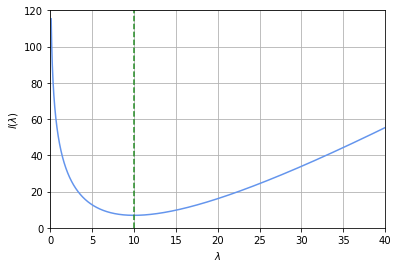

In [51]:
fig, ax = plt.subplots(1,1)

x = np.linspace(0.1, 40, 10000)
y = l(x)

min_x = x[y == np.min(y)]

ax.plot(x, y, label = "$l(\lambda)$", color = "cornflowerblue")
ax.vlines(min_x, 0, 120, ls = "dashed", color = "forestgreen", label = "$\lamda_\text{min}$")

ax.set_xlabel("$\lambda$")
ax.set_ylabel("$l(\lambda)$")
ax.set_xlim(0, 40)
ax.set_ylim(0, 120)

#ax.legend()
plt.grid()

print("Minimum: (", min_x, ",", l(min_x),")")